# Plotting a NDDataset

<div class='alert alert-info'>

**NOTE** : By default, all matplolib figures will be plotted **inline** in this notebook. 
to change this behaviour, uncomment (which means: remove the #) the next line (which must be placed before importing the  ``spectrochempy.api`` library!

</div>

In [1]:
from spectrochempy import *

SpectroChemPy's API - v.0.1a5.dev6+g2f6014e6.d20190111
© Copyright 2014-2019 - A.Travert & C.Fernandez @ LCS


Let's first import a NDDataset from a file:

In [2]:
import os
dataset = NDDataset.read_omnic(os.path.join('irdata', 'NH4Y-activation.SPG'))
print(dataset.description)

Dataset from spg file : NH4Y-activation.SPG 
History of the 1st spectrum: vz0521.spa, Thu Jul 07 06:10:41 2016 (GMT+02:00)


To plot a dataset, use the `plot` command (generic plot). As the current NDDataset is 2D, a contour plot is displayed by default.

<IPython.core.display.Javascript object>


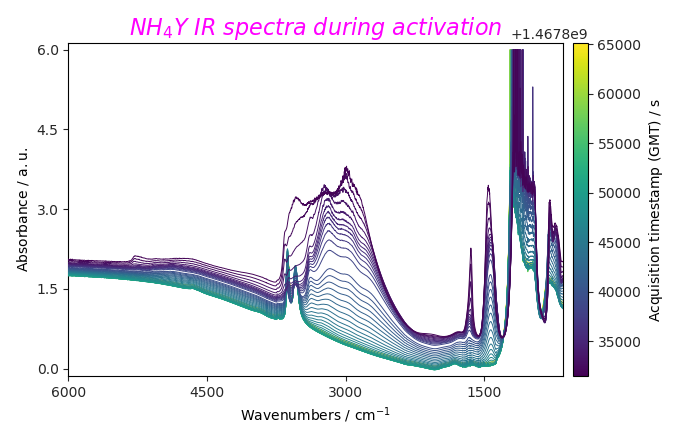

In [3]:
_ = dataset.plot() # plot the source.  

In [4]:
#import matplotlib as mpl
#mpl.rcParams

The plot function return a reference to the subplot on which the data have been plotted.
We can then use this reference to modify some element of the plot.

For example, here we add a title:

In [5]:
title = dataset.ax.set_title('NH$_4$Y IR spectra during activation')
title.set_color('magenta')
title.set_fontstyle('italic')
title.set_fontsize(16)

Note that by default, *sans-serif* font are used for all text in the figure. 

But if you prefer, *serif* font can be used instead. The easiest way to do this is to change the plot style:

<IPython.core.display.Javascript object>


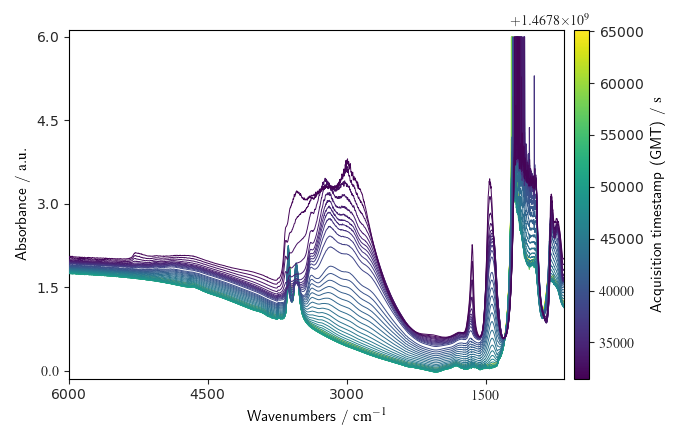

In [6]:
_ = dataset.plot(style='serif')

Other styles are :
* paper , which create figure suitable for two columns article (fig width: 3.4 inch)
* poster
* talk
* grayscale

<IPython.core.display.Javascript object>


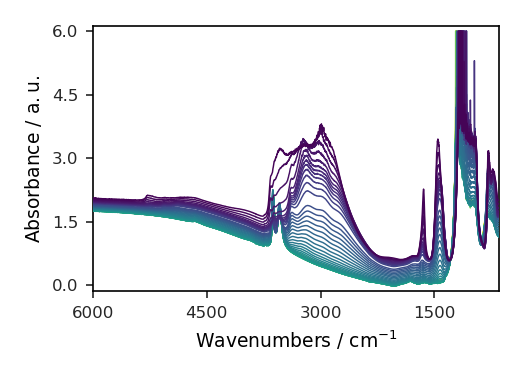

In [7]:
_ = dataset.plot(style='paper', colorbar=False)

To get a list of all available styles :

In [8]:
available_styles()

['paper', 'poster', 'serif', 'lcs', 'grayscale', 'talk', 'sans', 'notebook']

these styles can be combined

<IPython.core.display.Javascript object>


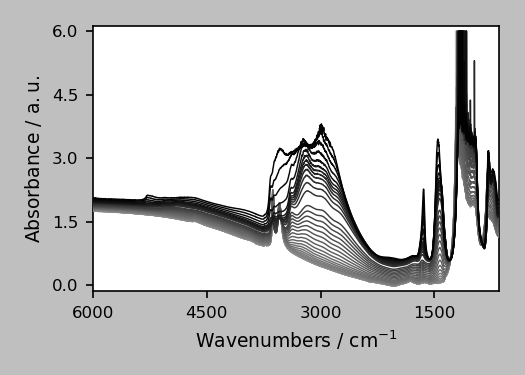

In [9]:
_ = dataset.plot(style=['sans','paper','grayscale'], colorbar=False)

New styles can also be created, using a simple dictionary:

<IPython.core.display.Javascript object>


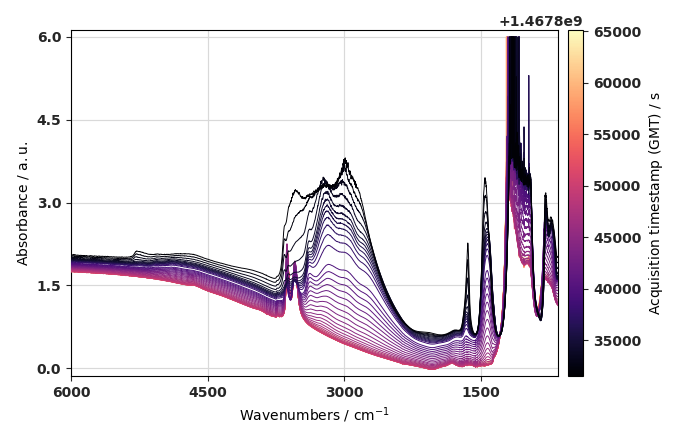

In [10]:
mystyle={'image.cmap':'magma', 
         'font.size':10, 
         'font.weight':'bold', 
         'axes.grid':True}
#TODO: store these styles for further use
_ = dataset.plot(style=mystyle)

To display all entry for definig plot style, uncomment the next line:

In [11]:
#import matplotlib as mpl
#mpl.rcParams

## Changing axis
The `y` axis with timestamp in the above plots is not very informative, lets rescale it in hours and change the origin. 

<IPython.core.display.Javascript object>


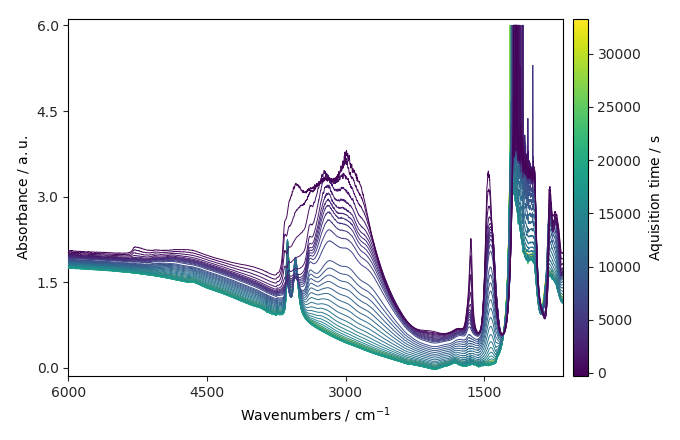

In [12]:
dataset.y -= dataset.y[0]                # change origin
dataset.y.title = u'Aquisition time'    # change the title (default axis label)
dataset.y.to('hour')                    # change unit base
_ = dataset.plot()

By default, plots are done in contour mode.

If you like to have stacked plot, you can use:

<IPython.core.display.Javascript object>


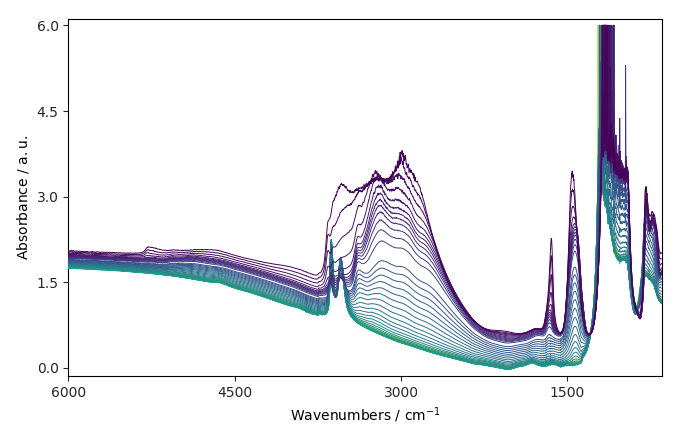

In [13]:
_ = dataset.plot(method='stack', style='sans', colorbar=False)

We can change or add labels to axes after creation of the dataset  #TODO

We can plot several datasets on the same figure

<IPython.core.display.Javascript object>


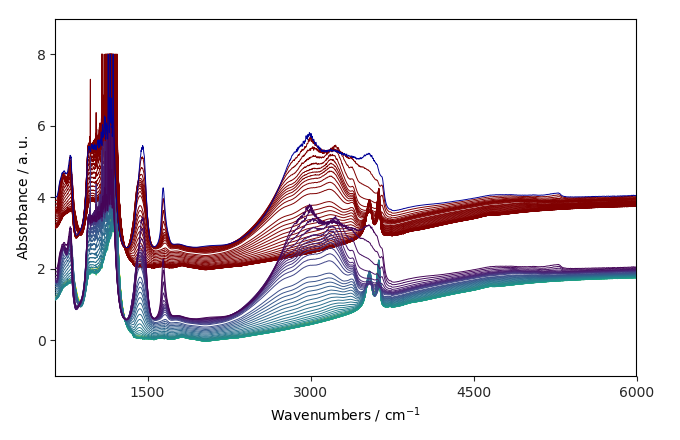

(-1, 9)

In [14]:
dataset.plot(method='stack', style='sans', colorbar=False)

so = dataset.copy()
so += 2

_ = so.plot(method='stack', colormap='jet', data_only=True, clear=False)
so.ax.set_ylim(-1,9)